#Un poco de teoría sobre la integración

La integración numérica es una de las herramientas más utilizadas eb distintas disciplinas de las ciencias exactas y la ingeniería. Los distintos métodos existentes parten de la idea de discretizar el proceso de integración como la suma de contribuciones n-ésimas partes de un intervalo. La idea de éstas aproximaciones pueden evidenciarse con el desarrollo de las Sumas de Riemann, al descomponer el área de cualquier curva como la suma de múltiples áreas de diferentes rectángulos.

\begin{equation}
\int\limits_{a}^{b} \mathrm{f}(x)\mathrm{d}x = \sum\limits_{n=1}^{\infty} \lim_{x_{n} - x_{n-1}\to 0}\ f(x_{n})(x_{n} - x_{n-1}); x_{n}\in[b - a]
\end{equation}

El proceso de discretización permite seleccionar el tipo de área conocida para mapear el área de una función, de ésta manera es posible obtener una aproximación que dependerá del número de elementos que mapean la función y el área conocida. Bajo ésta idea los métodos de integración básica pueden presentarse en las formulas de Newton - Cotes.

Las formulas de Newton - Cotes cerradas son un amplio conjunto de técnicas de integración utilizando la idea de descomponer el dominio de integración $x\in[a, b]$ en $n$ puntos equidistantes a una distancia $h$. La imagen de éstos puntos en la función representan el comportamiento de algunas de las partes más relevantes. La idea descomponer el dominio y su imagen, también puede ser vista como la interpolación de la función a través de un polinomio de grado $n$. El área entonces se calcula al sumar la contribución ponderada (las imágenes de los puntos por un factor de escala) multiplicado por el factor ponderado de espaciamiento $h$, estableciendo:

\begin{equation}
\int\limits_{a}^{b} \mathrm{f}(x)\mathrm{d}x \approx \sum\limits_{i=1}^{n-1} w_{i}f(x_{i})
\end{equation}

donde $w_{i}$ es el factor de ponderación. Éste proceso define qué elementos del interpolador contribuyen más al momento re realizar la suma. El factor de $h$, el tipo de ponderación y el grado del interpolador están definidos por la figura geométrica que mapea la función. De la misma manera al tener un interpolador de mayor grado, la precisión del método es mayor. Para cada interpolador, existe un término de error analítico que dependerá de las derivadas de la función a evaluar. De manera similar las formulas abiertas de Newton - Cotes, poseen la misma estructura, pero difiere en la forma de tratar el primer elemento del interpolador, cual no es considerado en la contribución del área.

Como defecto del método está la limitación del grado de la función a evaluar. Cuando el grado del interpolador aumenta, el número de oscilaciones en los bordes aumenta también; éste comportamiento es conocido como el fenómeno de Runge. Este fenómeno ocasiona que las áreas debajo la curva en los puntos de mayor oscilación posean un área mucho mayor, generando errores exponenciales.

#Sobre éste Notebook

Éste Ipython Notebook presenta el funcionamiento y características de los métodos de integración de las reglas compuestas. Ésta variante de los métodos anteriormente presentados, está en la adecuada selección del espaciamiento entre los puntos que contribuyen en el área. Mientras que en las formulas de Newton-Cotes simples el intervalo de $[a,b]$ es separado equidistantemente. Con las reglas compuestas el intervalo que forma $[a, a+h]$ también es dividido en $h$ divisiones, ésto permite subdividir todos las divisiones primarias, permitiendo una contribución mucho más fina de cada punto.

Las reglas compuestas de Newton-Cotes se subdividen en las reglas de Simpson, Trapecio y Punto Medio. Cada una aplica la idea de subdividir los intervalos, pero la función de ponderación y el tamaño del intervalo varían entre sí. El código presente en el notebook, utiliza las funciones desarrolladas y contenidas en el módulo $Numericos$ en el submódulo $compositerules$. Los archivos fuente son cargados desde el repositorio del proyecto desde GitHub. En caso de tener una copia local del repositorio, también se puede modificar la ruta en el notebook para importar localmente.

Para ejecutar todo el notebook es necesario correr todas las celdas y verificar que las celdas con el código fuente, tengan un indicio de que fueron leidos por el kernel de python. Ésto se puede verificar en el indicativo de Input $In[\,]$ de la celda, posea un número asignado, en lugar de $In[*]$. Si es la primera vez que se corre el notebook, siempre ejecutar las primeras celdas para poder cargar efectivamente las librerias y programas.

In [57]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/integrators/compositerules/compmidtrule.py
#!/usr/bin/python
"""
    Description: function compmidtrule is part of the Composite Integration
    Techniques and can be thought as an upgrated version of midpoint rule
    integration technique that aproximates a defined integal evaluated in [a,b]
    with better presicion in larger intervals. It's truncation error is of order
    h^2 and defined by a second order derivative.
    
    Inputs: lowerlimit - float - defines first limit of integration.
            upperlimit - float - defines last limit of integration.
            redc - integer - even integer that defines subintervals.
            function - function type object - evaluates f(x) at x.
            
    Outputs: integ - float - defined integral aproximation
    
    Example line: compmidtrule(-3.15, 6.2, 500, (lambda x: 2*x**3 + 4.3));
                  
    Dependencies: None.
    
    Version: 1.2 for Python 3.4
    
    Definitions were taken from:
        Richard L. Burden, J. Douglas Faires. "Numerical Analysis" 9th ed.
        "Chapter 4 - Numerical Differentiation and Integration". 
        Cengage Learning. 2010. pp: 203 - 209.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 28/12/2014.
"""

def compmidtrule(lowerlimit, upperlimit, redc, function):
    
# Initial input error verification
    if redc % 2 != 0:
        raise Exception('Reduced inverval - redc- must be an even integer');
        
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");
        
# Zero initializing         
    sumf = 0;
    x_array = [0]*(redc + 2);
    
# Grid spacing
    h = (upperlimit - lowerlimit)/(redc + 2);
    
# Integration Domain Generation & sum aproximation
    for i in range(-1, redc + 1):
        x_array[i] = lowerlimit + (i + 1)*h;
        sumf = sumf + function(x_array[i]);

    integ = h*sumf;
    
    return(integ);

In [58]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/integrators/compositerules/compsimprule.py
#!/usr/bin/python
"""
    Description: function compsimprule is part of the Composite Integration
    Techniques and can be thought as an upgrated version of Simpson rule
    integration technique that aproximates a defined integal evaluated in [a,b]
    with better presicion in larger intervals. It's truncation error is of order
    h^4 and defined by a fourth order derivative. Presicion is slighly better
    than Composite midpoint rule and so is the best option when minimizing
    number of computations. Is also known to be an all-purpose quadrature algorithm.
    
    Inputs: lowerlimit - float - defines first limit of integration.
            upperlimit - float - defines last limit of integration.
            redc - integer - even integer that defines subintervals
            function - function type object - evaluates f(x) at x.
            
    Outputs: integ - float - defined integral aproximation
    
    Example line: integ = compsimprule(0, 2, 1000, (lambda x: 4*x**3));
                  
    Dependencies: None.
    
    Version: 1.2 for Python 3.4
    
    Definition and structure were taken from:
        Richard L. Burden, J. Douglas Faires. "Numerical Analysis" 9th ed.
        "Chapter 4 - Numerical Differentiation and Integration". 
        Cengage Learning. 2010. pp: 203 - 209.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 28/12/2014.
"""

def compsimprule (lowerlimit, upperlimit, redc, function):

# Initial input error verification
    if redc % 2 != 0:
        raise Exception('Reduced inverval - redc- must be an even integer');
        
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");
        
# Initial assignation and zero initializing       
    h = (upperlimit - lowerlimit)/redc;
    XI0 = function(lowerlimit) + function(upperlimit);
    XI1 = 0;
    XI2 = 0;
    
# Integration Domain Generation    
    for i in range (1,(redc-1)):
        X = lowerlimit + i*h;
        
        if i % 2 == 0:
            XI2 = XI2 + function(X);
        else:
            XI1 = XI1 + function(X);
            
# Simpson standard rule for aproximation            
    XI = h*(XI0 + 2*XI2 + 4*XI1)/3;
    
    return(XI);

In [59]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/integrators/compositerules/comptraprule.py
"""
    Description: function comptraprule is part of the Composite Integration
    Techniques and can be thought as an upgrated version of Trapezoidal rule
    integration technique that aproximates a defined integal evaluated in [a,b]
    with better presicion in larger intervals. It's truncation error is of order
    h^2 and defined by a second order derivative. Similar to compmidtrule but
    request more operations Presicion is similar to Composite midpoint rule.
    Difference from the other methods is the need of only one integration interval
    therefore the number of subintervals can be even or odd.
    
    Inputs: lowerlimit - float - defines first limit of integration.
            upperlimit - float - defines last limit of integration.
            redc - integer - integer that reduces space grid in domain.
            function - function type object - evaluates f(x) at x.
            
    Outputs: integ - float - defined integral aproximation
    
    Example line: integ = comptraprule(-2, 2, 40, (lambda x: 3*x**4));
                  
    Dependencies: None.
    
    Version: 1.2 for Python 3.4
    
    Definitions were taken from:
        Richard L. Burden, J. Douglas Faires. "Numerical Analysis" 9th ed.
        "Chapter 4 - Numerical Differentiation and Integration". 
        Cengage Learning. 2010. pp: 153 - 156.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 28/12/2014.
"""

def comptraprule (lowerlimit, upperlimit, redc, function):

#  Input error verification   
    if redc % 2 != 0:
        raise Exception('Reduced inverval - redc- must be an even integer');
        
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");
        
# Zero initialing        
    sumf = 0.0;
        
# Space grid size
    h = (upperlimit - lowerlimit)/redc;
 
# Main loop - Composite trapezoidal rule approximation .
    for k in range(1, redc):
        sumf = sumf + 2*function(lowerlimit + k*h);
        
    integ = 0.5*h*(sumf + function(upperlimit) + function(lowerlimit));
    
    return(integ);

#El código
El código a continuación carga los diferentes módulos que se ejecutarán a lo largo del notebook. Los tres primeros parámetros que se pueden modificar son $size$, $IntegSamples$ y $function$ que definen respectivamente el tamaño del espacio de integración, el número de divisiones del dominio, y la función a integrar.

Posterior a inicializar el programa, se entra en el ciclo de integración, donde se toman los tres métodos y se evalúa punto a punto los elementos del dominio. Los límites de integración por defecto se encuentran desde $-n$ hasta $n$, donde $n$ es el valor medio del números de muestras de $size$.

In [60]:
# -*- coding: utf-8 -*-
#!/usr/bin/python

# Import Modules
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import time
import numpy as np
#os.chdir(r'D..\numericos-interactivo\project_2014_numerical_methods')
#from Numericos.lib.integrators import compositerules
%matplotlib inline

# Data initializing
size = 100; # Defines the number of samples to be used 
IntegSamples = 100 # Defines the number 
function = lambda x: 2*x**2 + 0.25*x -0.36; # Defines a polynomial function to be evaluated
time1 = [0]*size;
time2 = [0]*size;
time3 = [0]*size;
data1 = [0]*size;
data2 = [0]*size;
data3 = [0]*size;
vector = [0]*size;
n = round(len(data1)/2); # Limits of integration
font = {'family' : 'serif','color'  : 'darkred', 'weight' : 'normal', 'size'   : 16} # font used in axes legend

# Integration loop for different values of x
for i in range(-n,n):
    # First method - Composite Simpson Ruke
    tic = time.clock();
    data1[i-n]=compsimprule(0, i, 100, function);
    toc = time.clock();
    time1[i] = toc - tic;
    
    # Second method - Composite Middle Ruke
    tic = time.clock();
    data2[i-n]=compmidtrule(0, i, 100, function);
    toc = time.clock();
    time2[i] = toc - tic;
    
    # First method - Composite Trapezoid Ruke
    tic = time.clock();
    data3[i-n]=comptraprule(0, i, 100, function);
    toc = time.clock();
    time3[i] = toc - tic;
    
    # Space vector
    vector[i-n] = i;

Los resultados de la integración son almacenados en las variables $data1$, $data2$, $data3$, respectivamente para los métodos compuestos de Simpson, Punto Medio y Trapecio. Los elementos del espacio son elementos enteros y son almacenados en la variable $vector$. Éstos valores son almacenados en una lista de listas, que alude al concepto de matriz, para poder ser representado en tablas.

In [61]:
# Storaging data to list array
Matrix = [[0 for x in range(size)] for x in range(4)];
Matrix[0][:] = vector;
Matrix[1][:] = data1;
Matrix[2][:] = data2;
Matrix[3][:] = data3;
df = pd.DataFrame(Matrix, index=['X', 'YS','YM','YT']);
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
X,-50.000000,-49.000000,-48.000000,-47.000000,-46.000000,-45.000000,-44.000000,-43.000000,-42.000000,-41.000000,...,40.000000,41.000000,42.000000,43.000000,44.000000,45.00000,46.000000,47.000000,48.000000,49.000000
YS,-79744.323333,-75048.185903,-70540.121088,-66216.285705,-62072.836571,-58105.930500,-54311.724309,-50686.374815,-47226.038832,-43926.873177,...,41174.474667,44336.028577,47655.396432,51136.421415,54782.946709,58598.81550,62587.870971,66753.956305,71100.914688,75632.589303
YM,-81784.411733,-76968.191852,-72344.851488,-67910.449273,-63661.043838,-59592.693815,-55701.457834,-51983.394527,-48434.562526,-45051.020461,...,42224.905395,45467.150363,48871.238997,52441.112665,56180.712736,60093.98058,64184.857564,68457.285057,72915.204429,77562.557048
YT,-83007.000000,-78118.823300,-73426.406400,-68925.749100,-64612.851200,-60483.712500,-56534.332800,-52760.711900,-49158.849600,-45724.745700,...,42854.400000,46144.995700,49599.849600,53222.961900,57018.332800,60989.96250,65141.851200,69477.999100,74002.406400,78719.073300


Con los valores obtenidos, se realiza una una comparación con los valores analíticos de la integración de la función. En el caso de que se haya cambiado la función inicial, también es necesario cambiar el parámetro $analityc$ por la integración analitica de la función inicial. Para la comparación, se crea un espacio con el mismo número de muestras. Los resultados analíticos y numéricos son visualizados en la misma gráfica para observar la forma de las funciones.

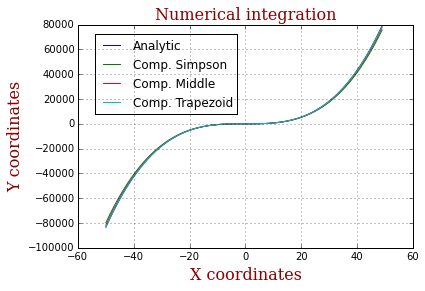

In [62]:
# Analytic integration comparison
x = np.linspace(-n,n-1,size);
analityc = lambda x: 0.67*x**3 + 0.125*x**2 - 0.36*x;
y = analityc(x);

# Plotting of data
plt.plot(x,y, label = "Analytic");
plt.plot(vector,data1, label = "Comp. Simpson");
plt.plot(vector,data2, label = "Comp. Middle");
plt.plot(vector,data3, label = "Comp. Trapezoid");
plt.axis('auto') # according to list data, axes are adjust in the plot
plt.title('Numerical integration', fontdict=font); 
plt.xlabel('X coordinates', fontdict=font);
plt.ylabel('Y coordinates', fontdict=font);
plt.grid();
plt.legend( ('Analytic','Comp. Simpson', 'Comp. Middle', 'Comp. Trapezoid'),loc=[0.05,0.6]);
plt.show();

En el código siguiente se evalúan las áreas computadas entre la función analítica y los valores de la integración numérica. Para ésta visualización se cambian los atributos de lista a arreglo de $numpy$ para poder evaluar los valores dentro del intervalo de integración. Posteriormente se visualizan las áreas de integración obtenidas por el método compuesto de Simpson.

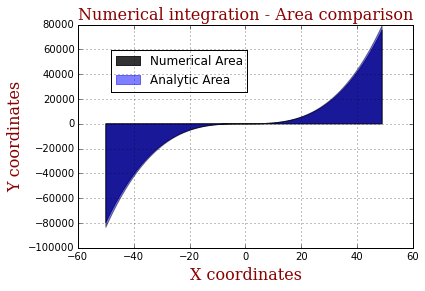

In [63]:
# list to vector convertion
xa = np.asarray(vector);
ya = np.asarray(data1);
yb = np.asarray(data2);
yc = np.asarray(data3);

# Values within selected integration area
xint = xa[np.logical_and(xa>=-n, xa<=n)];
yint1 = ya[np.logical_and(xa>=-n, xa<=n)];
yint2 = yb[np.logical_and(xa>=-n, xa<=n)];
yint3 = yc[np.logical_and(xa>=-n, xa<=n)];
x1int = x[np.logical_and(x>=-n, x<=n)];
y1int = y[np.logical_and(x>=-n, x<=n)];

# Plotting with selected area
plt.fill_between(xint, 0, yint1, facecolor='black', alpha=0.8);
plt.fill_between(x1int, 0, y1int, facecolor='blue', alpha=0.5);
plt.axis('auto');
plt.title('Numerical integration - Area comparison', fontdict=font); 
plt.xlabel('X coordinates', fontdict=font);
plt.ylabel('Y coordinates', fontdict=font);
plt.grid();

# Plot Legends
blck_patch = mpatches.Patch(color='black', label='Numerical Area',alpha=0.8);
blue_patch = mpatches.Patch(color='blue', label='Analytic Area',alpha=0.5);
plt.legend(handles=[blck_patch,blue_patch],loc=[0.1,0.7]);
plt.show();

Las áreas superpuestas presentan una tonalidad de color azul oscuro, mientras que las áreas analíticas son de color negro y las áreas computados de color morado claro. En el caso de las funciones polinómicas, se encontrará una adecuada superposición visual, indicando que nuestra aproximación es adecuada. En el caso en que no haya una superposición total, para aumentar la precisión se recomienda aumentar el parámetro $IntegSamples$.

En las gráficas siguientes, se encuentran las áreas calculadas con los otros dos métodos, para observar las similitudes en la forma y los valores de la integración numérica.

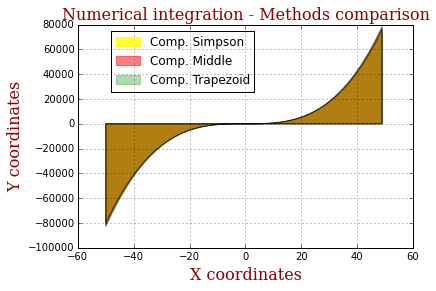

In [64]:
# Plotting with selected area
plt.fill_between(xint, 0, yint1, facecolor='yellow', alpha=0.8);
plt.fill_between(xint, 0, yint2, facecolor='red', alpha=0.5);
plt.fill_between(xint, 0, yint3, facecolor='green', alpha=0.3);
plt.axis('auto');
plt.title('Numerical integration - Methods comparison', fontdict=font); 
plt.xlabel('X coordinates', fontdict=font);
plt.ylabel('Y coordinates', fontdict=font);
plt.grid();

# Plot Legends
yelw_patch = mpatches.Patch(color='yellow', label='Comp. Simpson',alpha=0.8);
red_patch = mpatches.Patch(color='red', label='Comp. Middle',alpha=0.5);
gren_patch = mpatches.Patch(color='green', label='Comp. Trapezoid',alpha=0.3);
plt.legend(handles=[yelw_patch,red_patch,gren_patch],loc=[0.1,0.7]);
plt.show();

El siguiente análisis responde a cuánto tiempo de computo es necesario para cada método, por lo que se visualiza la tendencia de cada método para cada valor computado. Asimismo se calcula el tiempo promedio para la integración total.

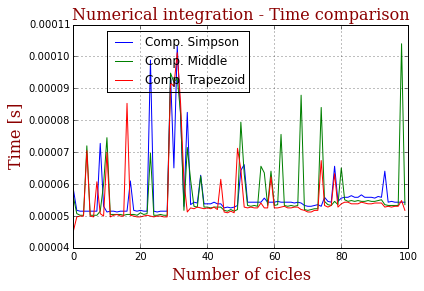

Mean time Composite Simpson Rule = 5.64619950296e-05 [s]
Mean time Composite Middle Rule = 5.72970270275e-05 [s]
Mean time Composite Trapezoid Rule = 5.51633409646e-05 [s]


In [65]:
#Plotting
plt.plot(time1, label="Comp. Simpson")
plt.plot(time2, label="Comp. Middle")
plt.plot(time3, label ="Comp. Trapezoid")
plt.axis('auto');
plt.title('Numerical integration - Time comparison', fontdict=font); 
plt.xlabel('Number of cicles', fontdict=font);
plt.ylabel('Time [s]', fontdict=font);
plt.grid();

# Plot Legends
plt.legend( ('Comp. Simpson', 'Comp. Middle', 'Comp. Trapezoid'),loc=[0.1,0.7]);
plt.show();

# Mean time required
print('Mean time Composite Simpson Rule = %s [s]'% np.mean(time1))
print('Mean time Composite Middle Rule = %s [s]'% np.mean(time2))
print('Mean time Composite Trapezoid Rule = %s [s]'% np.mean(time3))

Es usual que el comportamiento del tiempo fluctúe de manera consecutiva y de la misma manera que en ocasiones un método tarde más que en un ciclo previo. Sin embargo, con las funciones polinómicas, el método del Trapecio es el que sustancialmente demora menos en terminar el cálculo.

El último análisis que se propone, es de la precisión de cada método, para, ésto se considera la diferencia absoluta entre las áreas analíticas y las computadas. Un método que posee una buena precisión ha de marcar valores cercanos a cero, mientras que un método que se aleje del cero referencial, comienza a perder su precisión.

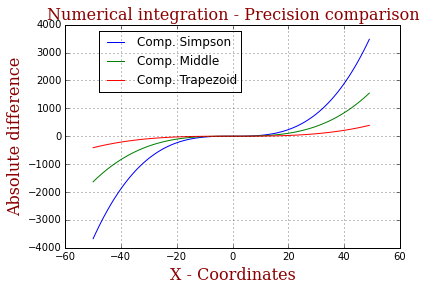

RMS Error of Composite Simpson Rule = 13929.2902044
RMS Error of Composite Middle Rule = 6195.16968572
RMS Error of Composite Trapezoid Rule = 1560.19429646


In [66]:
delta_simp = y - ya;
delta_mid = y - yb;
delta_trap = y - yc;
plt.plot(xa,delta_simp, label="Comp. Simpson");
plt.plot(xa,delta_mid, label="Comp. Middle");
plt.plot(xa,delta_trap, label ="Comp. Trapezoid");
plt.axis('auto');
plt.title('Numerical integration - Precision comparison', fontdict=font); 
plt.xlabel('X - Coordinates', fontdict=font);
plt.ylabel('Absolute difference', fontdict=font);
plt.grid();
plt.legend( ('Comp. Simpson', 'Comp. Middle', 'Comp. Trapezoid'),loc=[0.1,0.7]);
plt.show();
print('RMS Error of Composite Simpson Rule = %s'% np.sqrt(sum(delta_simp**2)));
print('RMS Error of Composite Middle Rule = %s'%  np.sqrt(sum(delta_mid**2)));
print('RMS Error of Composite Trapezoid Rule = %s'% np.sqrt(sum(delta_trap**2)));

En el caso de las funciones polinómicas el método en nuestra implementación de mejor precisión es el método compuesto del Trapecio, tanto por los valores de los Errores RMS (Root Mean Square o error eficaz) como su cercanía al cero en el error absoluto. Sin embargo hay que considerar que los errores son exponenciales por lo que para intervalos de integración grandes, los errores son de varios ordenes de magnitud, para compensarlo, se propone aumentar el número de divisiones por intervalo y reducir en parte el dominio de integración. 

# Otros métodos de integración
Para la integración numérica de funciones complejas con multiplicidad finita o para mayor precisión en el intervalo, se utilizan las técnicas elementales con un mejor muestreo del intervalo de integración. Entre estos el método de Romberg reutiliza las fórmulas de Newton - Cotes y técnicas de extrapolación, para refinar la precisión de la integración. A continuación se presenta la implementación realizada de este método, cargando el programa desde el repositorio remoto.

In [67]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/integrators/romberginteg.py
#!/usr/bin/python
"""
    Description: function romberginteg computes an approximation of a defined
    integral in [a,b]. Romberg Integration uses other minor techniques to produce
    accurate results. First aproximations are obtain from one of the Newton-Cotes
    Formulas and then results are improve with extrapolation techniques. Then
    the process is done all over again on the subinterval section. Every loop
    grid size is half for better presicion improvement.
    
    Inputs: lowerlimit - float - First element in integration interval
            upperlimit - float - Last element in integration interval
            subinterv - positive integer - Number of subintervals
            function - lambda object type - evaluates f(x) at x
            
    Outputs: R - list object - Romberg table - integration aproximation.
    
    Example code: R = romberginteg(-3.15, 6.2, 10, (lambda x: 2*x**3 + 4.3));
                  
    Dependencies: None.
    
    Version: 1.5 for Python 3.4
    
    Definition and structure were taken from:
        Richard L. Burden, J. Douglas Faires. "Numerical Analysis" 9th ed.
        "Chapter 4 - Numerical Differentiation and Integration". 
        Cengage Learning. 2010. pp: 213 - 218.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 19/02/2015.
"""

def romberginteg(lowerlimit, upperlimit, subinterv, function):

# Input verification    
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");

# List of list assignation    
    R = [[ 0 for i in range(subinterv+1) ] for j in range(subinterv+1)];

# Spatial grid size
    h = (upperlimit - lowerlimit);

# First Seed Approximation
    R[0][0] = 0.5*h*(function(upperlimit) + function(lowerlimit));

# Main Loop -> Composite Trapezoide approx. -> Extrapolation
    for i in range(1, (subinterv + 1)):
        h = 0.5 * h;
        sumf = 0.0;
        for j in range( 1, 2**i, 2 ):
            sumf = sumf + function( lowerlimit + j * h );

        R[i][0] = (0.5 * R[i-1][0]) + (sumf * h); # Increase result accuracy 

        for k in range( 1, i + 1 ):
            R[i][k] = R[i][k-1] + ( R[i][k-1] - R[k-1][k-1] ) / ( 4**i - 1 )
        
    return(R);  
  

Las técnicas de integración avanzadas plantean la idea de discretizar de manera más minuciosa el dominio de integración, permitiendo que en cada ciclo haya una redefinición del intervalo de integración. El nuevo intervalo puede definirse nuevamente a través de dos parámetros: el número de divisiones o el paso del intervalo. Éstos parámetros son mutuamente excluyentes, pero implícitamente aluden al uno o al otro. El usuario puede definir de manera a priori el paso absoluto de todos los intervalos o el programa puede redefinir de manera autoconsistente. Es decir que dado un criterio de convergencia, el programa toma el valor de $h$ presente y calcula uno nuevo. En el caso de la integración de Romberg cada valor nuevo de $h$ está definido por $h/(2n)$, donde $n$ es el número del ciclo.

Ésto permite generar un mejor muestreo de la función y directamente un refinamiento en las aproximaciones. Sin embargo un alto número de ciclos puede llevar a subdivisiones muy finas, incrementando el costo computacional. Por tanto la refinación del dominio de integración lleva el riesgo a extensos tiempos de computo, por lo que se recomienda un acuerdo entre precisión y números de ciclos. Un valor efectivo de precisión se puede obtener al observar que las diferencias en magnitud entre un ciclo anterior y uno actual, disminuyen hasta una cifra decimal de interés. En la celda siguiente se presenta la puesta en marcha para el método Romberg implementado y posteriormente el método de la cuadratura adaptativa.

Las cuadraturas en general son las técnicas más avanzadas presentes en los métodos numéricos. En el caso de la integración, existen las cuadraturas de Hermite o de Gauss son una de las técnicas de mayor nivel presentes en ésta categoría.

In [68]:
data4 = [0]*size;
time4 = [0]*size;
# Integration loop for different values of x
for i in range(-n,n):
    # First method - Composite Simpson Ruke
    tic = time.clock();
    dummy = romberginteg(0, i, 10, function);
    toc = time.clock();
    data4[i-n]=dummy[len(dummy)-1][len(dummy)-1]
    time4[i] = toc - tic;
    
yd = np.asarray(data4);
delta_romb = (y - yd);

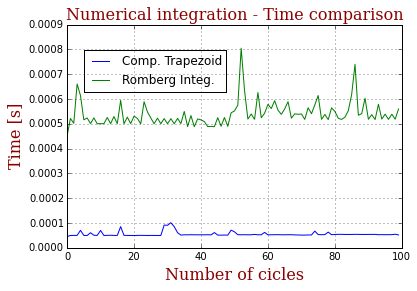

Mean time Composite Trapezoid Rule = 5.51633409646e-05 [s]
Mean time Romberg Integration = 0.00053892606688 [s]


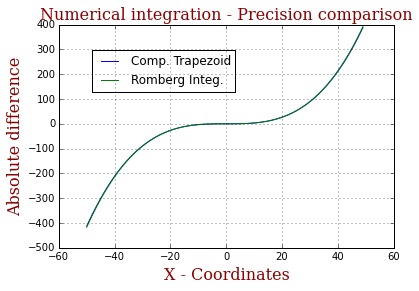

RMS Error of Composite Trapezoid Rule = 1560.19429646
RMS Error of Romberg Integration = 1575.95383481


In [69]:
#Plotting - Romberg Time
plt.plot(time3, label ="Comp. Trapezoid")
plt.plot(time4, label="Romberg Integ.")
plt.axis('auto');
plt.title('Numerical integration - Time comparison', fontdict=font); 
plt.xlabel('Number of cicles', fontdict=font);
plt.ylabel('Time [s]', fontdict=font);
plt.grid();
plt.legend( ('Comp. Trapezoid','Romberg Integ.'),loc=[0.05,0.7]);
plt.show();

# Mean time required
print('Mean time Composite Trapezoid Rule = %s [s]'% np.mean(time3))
print('Mean time Romberg Integration = %s [s]'% np.mean(time4))

plt.show()

#Plotting - Romberg Error
plt.plot(xa,delta_trap, label ="Comp. Trapezoid");
plt.plot(xa,delta_romb, label="Romberg Integ.");
plt.axis('auto');
plt.title('Numerical integration - Precision comparison', fontdict=font); 
plt.xlabel('X - Coordinates', fontdict=font);
plt.ylabel('Absolute difference', fontdict=font);
plt.grid();
plt.legend( ('Comp. Trapezoid','Romberg Integ.'),loc=[0.1,0.7]);
plt.show();
print('RMS Error of Composite Trapezoid Rule = %s'% np.sqrt(sum(delta_trap**2)));
print('RMS Error of Romberg Integration = %s'% np.sqrt(sum(delta_romb**2)));

In [70]:
# %load https://raw.githubusercontent.com/fisicatyc/numericos-interactivo/master/project_2014_numerical_methods/Numericos/lib/integrators/adapquad.py
#!/usr/bin/python
"""
    Description: function adapquad is an adaptive quadrature method based on 
    Simpson's rule for integration. It can also can be expanded into another 
    integration technique by replacing those lines. It provides more accurate 
    results by dividing the integration interval [a,b] into n subintervals, 
    and again applying integration rule until achiving desired tolerance in 
    each subinterval. If not met, the subinterval is divided again and the 
    process is done again.
    
    Inputs: lowerlimit - float or integer - integration interval element.
            upperlimit - float or integer - integration interval element.
            tol_val - float - desired error tolerance in calculated value.
            n - integer - numbers of levels or subintervals to generate.
            function - function type object - evaluates f(x) at x.
            
    Output: app - float - defined integral aproximation.
    
    Example line: adapquad(-2, 4, 0.005, 10, (lambda x: 4*sin(x)**2));
    
    Dependencies: None.
    
    Version: 1.1 for Python 3.4
    
    Definition and structure were taken from:
        Richard L. Burden, J. Douglas Faires. "Numerical Analysis" 9th ed.
        "Chapter 4 - Numerical differentiation and integration". 
        Cengage Learning. 2010. pp: 220 - 226.
        
    Author: J.J. Cadavid - SFTC - EAFIT University.
    Contact: jcadav22@eafit.edu.co
    
    Date: 29/12/2014.
"""

def adapquad (lowerlimit, upperlimit, tol_val, n, function):
    
# Initial input error verification
    test = lambda: None;
    if isinstance(function,type(test)) == 0:
        raise Exception("function must be lambda object-type");
        
# Zero initializing - list Type   
    tol = [0]*n;
    a = [0]*n;
    h = [0]*n;
    fa = [0]*n;
    fc = [0]*n;
    fb = [0]*n;
    s = [0]*n;
    l = [0]*n;
    
# Initial value assignation - Definition of spatial grid size
    app = 0;
    i = 1;
    tol[i-1] = 10*tol_val;
    a[i-1] = lowerlimit;
    h[i-1] = (upperlimit - lowerlimit)/2;
    fa[i-1] = function(lowerlimit);
    fc[i-1] = function((lowerlimit + h[0]));
    fb[i-1] = function(upperlimit);
    s[i-1] = h[0]*(fa[0] + 4*fc[0] + fb[0])/3; # Simpson rule - can be change with other rule
    l[i-1] = 1;

# Main loop reasigns variables for each subinterval generated
    while i>0:
        fd = function(a[i-1] + h[i-1]/2);
        fe = function(a[i-1] + 3*h[i-1]/2);
        s1 = h[i-1]*(fa[i-1] + 4*fd + fc[i-1])/6;
        s2 = h[i-1]*(fc[i-1] + 4*fe + fb[i-1])/6;
        v1 = a[i-1];
        v2 = fa[i-1];
        v3 = fc[i-1];
        v4 = fb[i-1];
        v5 = h[i-1];
        v6 = tol[i-1];
        v7 = s[i-1];
        v8 = l[i-1];
        i = i - 1;
        
        if abs(s1 + s2 - v7) < v6:
            app = app + (s1 + s2);
        else:
            if v8 >= n:
                raise Exception('Maximum level exceeded.')
            else:
                i = i + 1;
                a[i-1] = v1 + v5;
                fa[i-1] = v3;
                fc[i-1] = fe;
                fb[i-1] = v4;
                h[i-1] = v5/2;
                tol[i-1] = v6/2;
                s[i-1] = s2;
                l[i-1] = v8 + 1;
                i = i + 1;
                a[i-1] = v1;
                fa[i-1] = v2;
                fc[i-1] = fd;
                fb[i-1] = v3;
                h[i-1] = h[i-2];
                tol[i-1] = tol[i-2];
                s[i-1] = s1;
                l[i-1] = [i-2];
                
    return(app);

In [71]:
data5 = [0]*size;
time5 = [0]*size;
# Integration loop for different values of x
for i in range(-n,n):
    # First method - Composite Simpson Ruke
    tic = time.clock();
    data5[i-n] = adapquad(0, i, 0.0000025, 20 ,function);
    toc = time.clock();
    time5[i] = toc - tic;

ye = np.asarray(data5);
delta_adap = (y - ye);

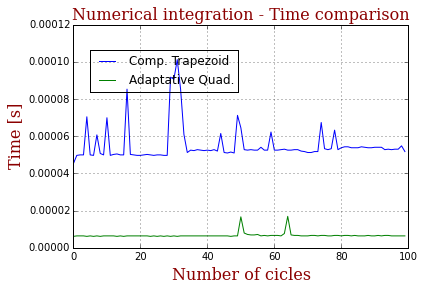

Mean time Composite Trapezoid Rule = 5.51633409646e-05 [s]
Mean time Adaptative Quadrature = 6.68794034596e-06 [s]


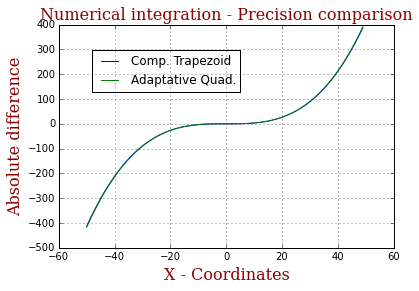

RMS Error of Composite Trapezoid Rule = 1560.19429646
RMS Error of Adaptative Quadrature = 1575.95383481


In [72]:
#Plotting - Adaptative Quadrature
plt.plot(time3, label ="Comp. Trapezoid")
plt.plot(time5, label="Adaptative Quad.")
plt.axis('auto');
plt.title('Numerical integration - Time comparison', fontdict=font); 
plt.xlabel('Number of cicles', fontdict=font);
plt.ylabel('Time [s]', fontdict=font);
plt.grid();
plt.legend( ('Comp. Trapezoid','Adaptative Quad.'),loc=[0.05,0.7]);
plt.show();

# Mean time required
print('Mean time Composite Trapezoid Rule = %s [s]'% np.mean(time3))
print('Mean time Adaptative Quadrature = %s [s]'% np.mean(time5))

plt.show()

#Plotting - Romberg Error
plt.plot(xa,delta_trap, label ="Comp. Trapezoid");
plt.plot(xa,delta_adap, label="Adaptative Quad.");
plt.axis('auto');
plt.title('Numerical integration - Precision comparison', fontdict=font); 
plt.xlabel('X - Coordinates', fontdict=font);
plt.ylabel('Absolute difference', fontdict=font);
plt.grid();
plt.legend( ('Comp. Trapezoid','Adaptative Quad.'),loc=[0.1,0.7]);
plt.show();
print('RMS Error of Composite Trapezoid Rule = %s'% np.sqrt(sum(delta_trap**2)));
print('RMS Error of Adaptative Quadrature = %s'% np.sqrt(sum(delta_adap**2)));

In [73]:
# Cambiar el formato del documento
#from IPython.core.display import HTML
#def css_styling():
#    styles = open('../styles/custom_ketch.css', 'r').read()
#    return HTML(styles)
#css_styling()